In [1]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [2]:
df = pd.read_csv("Archivos/profesionales_nonull.csv", index_col= 0)

In [3]:
df.head(1)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0


In [4]:
# Función para separar la columna con la que queremos trabajar, y dividir los datos en filas
def data_pregunta(dataf, colum):
    df = dataf[["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario",colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [5]:
# Lista para usar en el hue de las gráficas y poder hacer un for loop con la visualización
columnas_hue = ["edad", "genero", "estudios", "puesto_trabajo", "experiencia"]

---
## PRINCIPALES HERRAMIENTAS DE TRABAJO
---

Realizamos una serie de gráficas para visualizar las respuestas dadas a la pregunta: Qué librerias de visualización sueles usar?

In [6]:
# Creamos un DF ejecutando la función data_pregunta
df_visualizacion = data_pregunta(df, "herramientas_visualizacion")

/tmp/ipykernel_265/1211917562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [26]:
df_visualizacion.head()

,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,herramientas_visualizacion
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Matplotlib
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Seaborn
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Ggplot / ggplot2
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Shiny
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Leaflet / Folium


In [8]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_ordenada = df_visualizacion["herramientas_visualizacion"].value_counts().index.tolist()

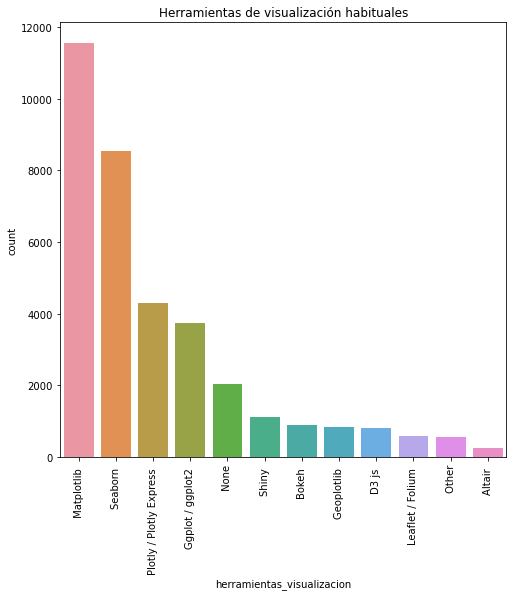

In [9]:
# Realizamos un countplot para visualizar las librerias de visualización más usadas
plt.figure(figsize =(8,8))
sns.countplot(x= "herramientas_visualizacion", data= df_visualizacion, order= lista_ordenada)
plt.title(label = "Herramientas de visualización habituales")
plt.xticks(rotation = 90)
plt.show()

Podemos ver que las librerías más usadas son Matplotlib y Seaborn, seguidas de lejos por Plotly y Ggplot.

In [10]:
# Sacamos una lista con las 4 librerías más usadas
list_herr = df_visualizacion["herramientas_visualizacion"].value_counts()[:4].index.tolist()

In [11]:
list_herr

[' Matplotlib ', 'Seaborn ', 'Plotly / Plotly Express ', 'Ggplot / ggplot2 ']

In [12]:
# Creamos un df filtrando por la lista con las librerías más habituales
df_herramientas = df_visualizacion.loc[df_visualizacion["herramientas_visualizacion"].isin(list_herr)]

In [13]:
df_herramientas.herramientas_visualizacion.value_counts()

 Matplotlib                 11551
Seaborn                      8535
Plotly / Plotly Express      4312
Ggplot / ggplot2             3745
Name: herramientas_visualizacion, dtype: int64

In [14]:
prueba = pd.DataFrame(df_herramientas.groupby(["edad"])["herramientas_visualizacion"].count())

In [15]:
prueba.sort_values(by= ["herramientas_visualizacion"], ascending= False)

,herramientas_visualizacion
edad,
25-29,6257
30-34,4877
22-24,4256
35-39,3578
40-44,2678
45-49,1917
18-21,1734
50-54,1245
55-59,792


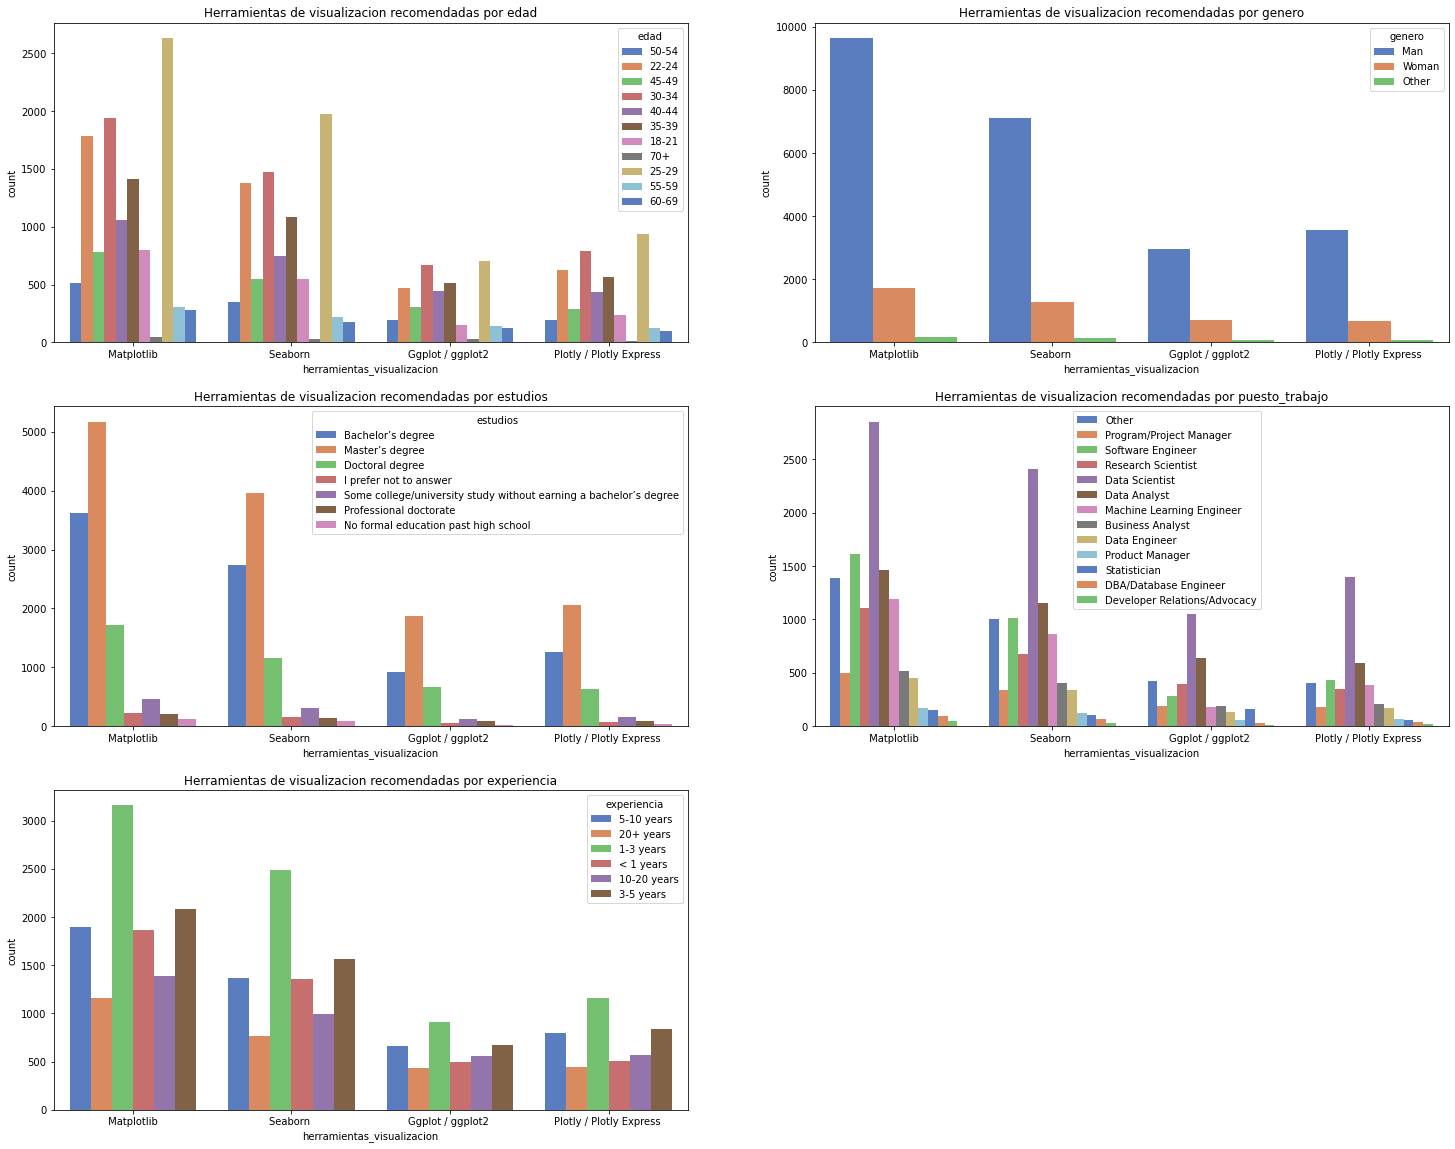

In [27]:
# Creamos un subplot con las gráficas de las herramientas de visualización por edad, genero, estudios, puesto de trabajo y experiencia
fig, axes = plt.subplots(3,2, figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(columnas_hue):
    sns.countplot(data = df_herramientas, x = "herramientas_visualizacion", hue= columna, ax = axes[indice], palette="muted")
    axes[indice].set_title(f"Herramientas de visualizacion recomendadas por {columna}")
axes[3].legend(bbox_to_anchor = (0.4,0.35))
fig.delaxes(axes[-1])
plt.show()

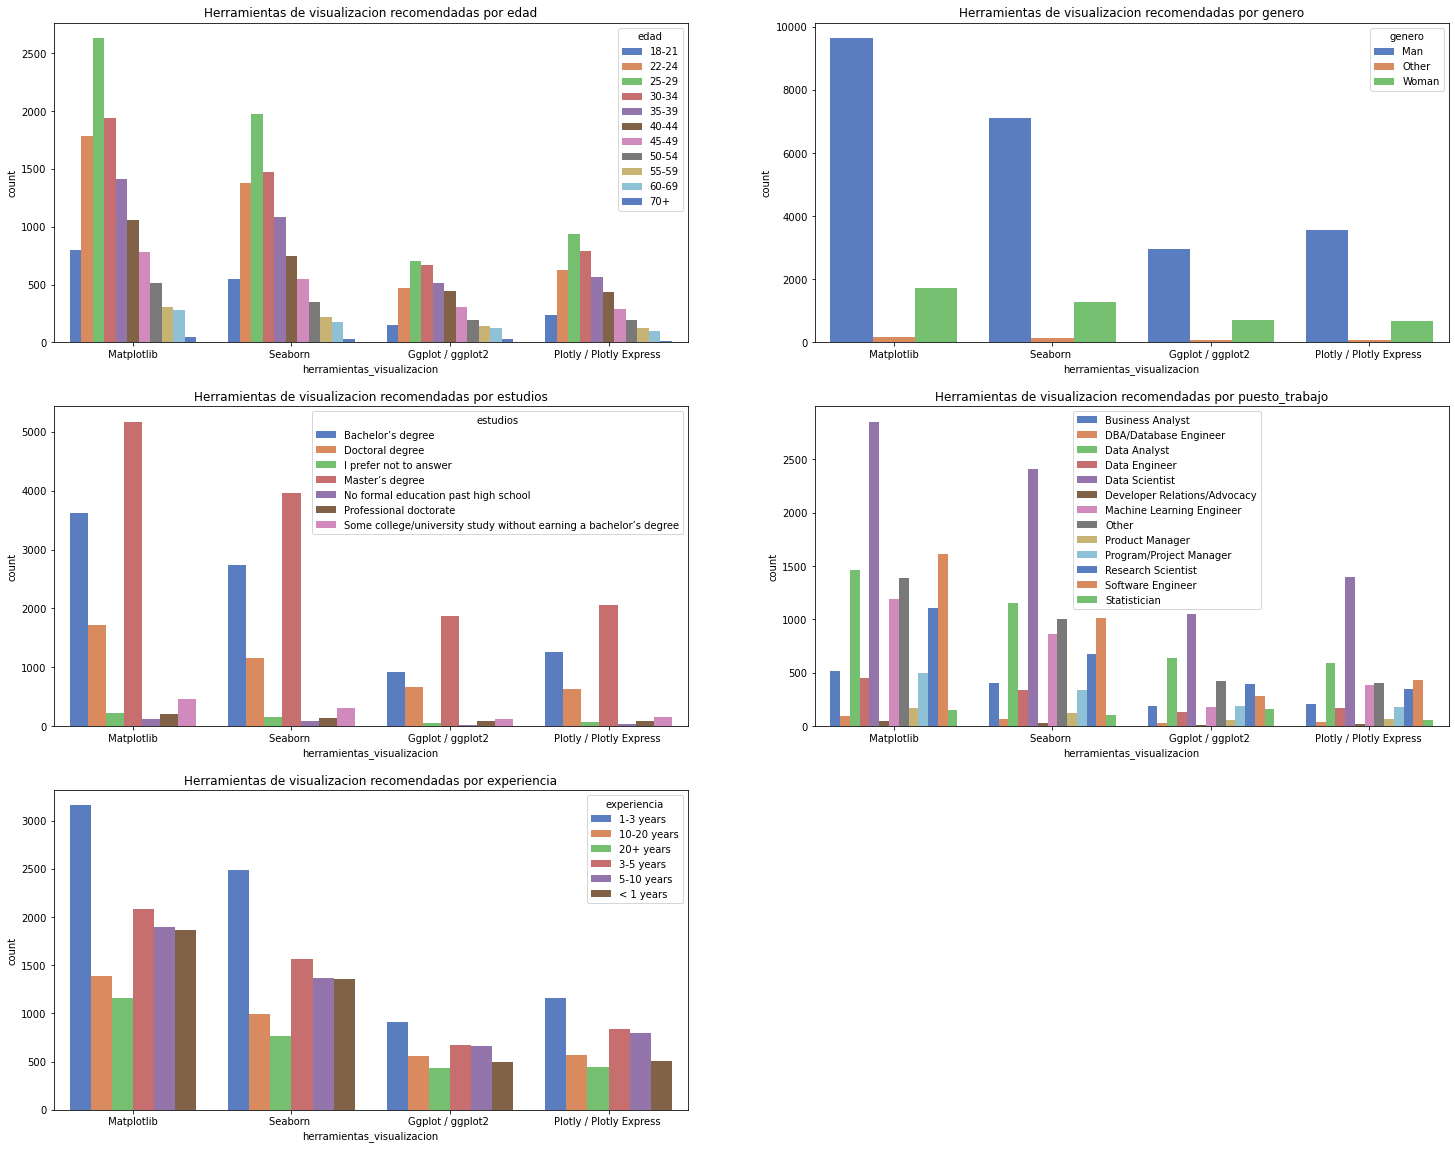

In [16]:
# Creamos un subplot con las gráficas de las herramientas de visualización por edad, genero, estudios, puesto de trabajo y experiencia
fig, axes = plt.subplots(3,2, figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(columnas_hue):
    sns.countplot(data = df_herramientas, x = "herramientas_visualizacion", hue= columna, ax = axes[indice], palette="muted", hue_order = df_herramientas.groupby(columna)["herramientas_visualizacion"].sum().index.tolist())
    axes[indice].set_title(f"Herramientas de visualizacion recomendadas por {columna}")
axes[3].legend(bbox_to_anchor = (0.4,0.35))
fig.delaxes(axes[-1])
plt.show()

---
## LENGUAJES QUE RECOMIENDAN LOS USUARIOS
---

In [17]:
lista_ordenada_leng = df["lenguaje_recomendado"].value_counts().index.tolist()

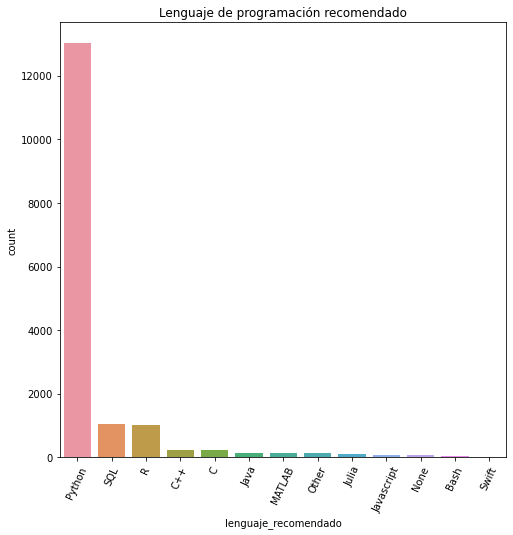

In [18]:
plt.figure(figsize =(8,8))
sns.countplot(x= "lenguaje_recomendado", data= df, order= lista_ordenada_leng)
plt.title(label = "Lenguaje de programación recomendado")
plt.xticks(rotation = 65)
plt.show()

In [19]:
list_leng = df["lenguaje_recomendado"].value_counts()[:3].index.tolist()

In [ ]:
stb.freq(df_lenguaje)

In [20]:
list_leng

['Python', 'SQL', 'R']

In [21]:
df_lenguaje = df.loc[df["lenguaje_recomendado"].isin(list_leng)]

In [22]:
df_lenguaje.head(2)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None,70000.0


In [33]:
df_lenguaje =df.stb.freq(["lenguaje_recomendado"], thresh= 93, other_label= "otros")

In [36]:
df_lenguaje

,lenguaje_recomendado,count,percent,cumulative_count,cumulative_percent
0,Python,13021,80.282385,13021,80.282385
1,SQL,1044,6.436895,14065,86.719280
2,R,1003,6.184105,15068,92.903385
3,otros,1151,7.096615,16219,100.000000


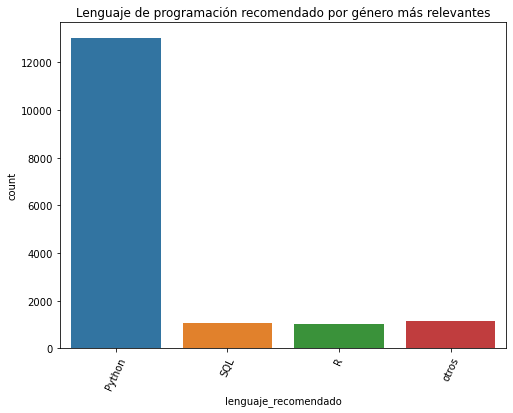

In [38]:
plt.figure(figsize =(8,6))
sns.barplot(x= "lenguaje_recomendado", data= df_lenguaje, y= "count")
plt.title(label = "Lenguaje de programación recomendado por género más relevantes")
plt.xticks(rotation = 65)
plt.show()

In [24]:
columnas_hue = ["edad", "genero", "estudios", "puesto_trabajo", "experiencia"]

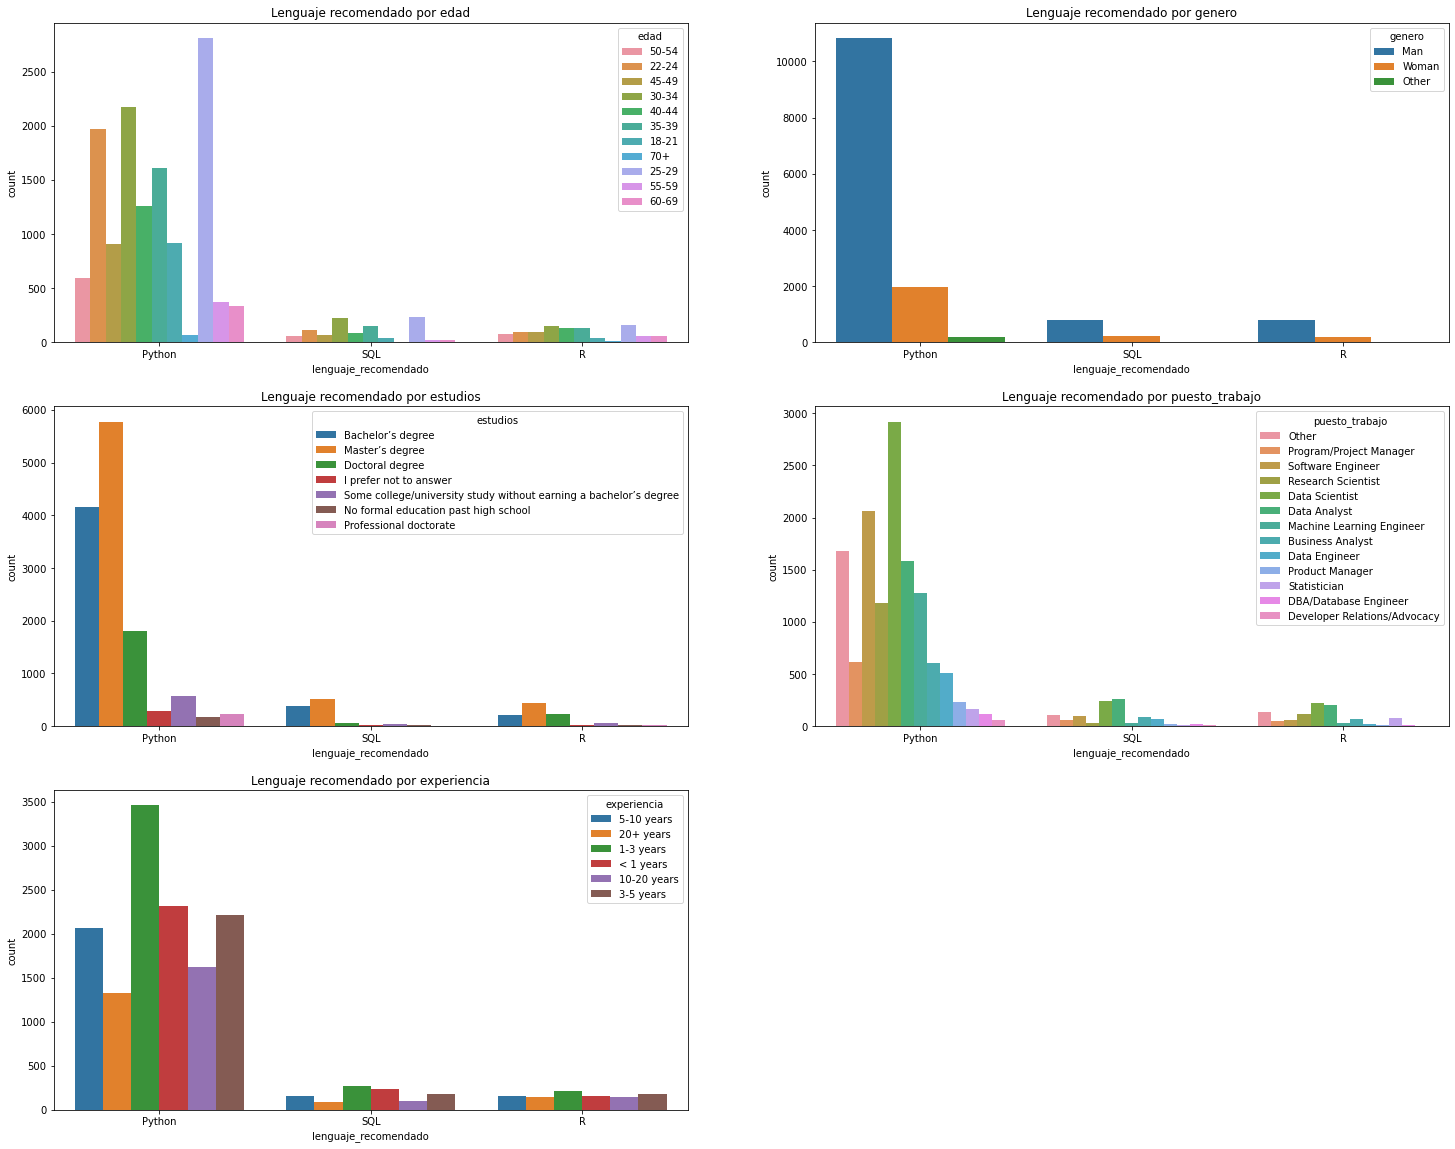

In [25]:
fig, axes = plt.subplots(3,2, figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(columnas_hue):
    sns.countplot(data = df_lenguaje, x = "lenguaje_recomendado", hue= columna, ax = axes[indice])
    axes[indice].set_title(f"Lenguaje recomendado por {columna}")
fig.delaxes(axes[-1])
plt.show()